In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import set_config
set_config(print_changed_only=False)

In [2]:
data=pd.read_csv('Supermarket_CustomerMembers.csv')

In [3]:
df=data
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df=df.drop(['CustomerID'],axis=1)

In [7]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df=df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending_Score'})
df.head()

,Genre,Age,Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\KS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='Spending_Score'>

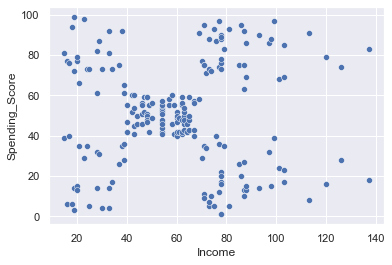

In [9]:
sns.scatterplot(df['Income'],df['Spending_Score'],data=df)

In [10]:
x=df[['Income','Spending_Score']]

In [11]:
x.head()

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [12]:
x.shape

(200, 2)

In [13]:
from sklearn.cluster import KMeans

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
X_scaled=scaler.fit_transform(df[['Income','Spending_Score']])

In [17]:
X_Scaled=pd.DataFrame(data=X_scaled,columns=[['Income','Spending_Score']])

In [18]:
X_Scaled.head()

,Income,Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [19]:
wss=[]

for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=50)
    kmeans.fit(X_Scaled)
    wss.append(kmeans.inertia_)

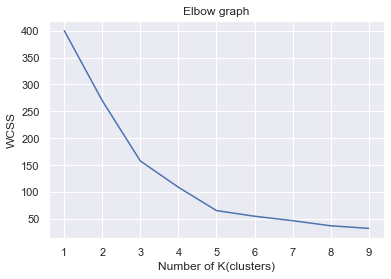

In [20]:
plt.plot(range(1,10),wss)
plt.title('Elbow graph')
plt.xlabel('Number of K(clusters)')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans=KMeans(n_clusters=5,init='k-means++')

In [22]:
Y=kmeans.fit_predict(X_Scaled)

In [33]:
clusters=kmeans.cluster_centers_

In [24]:
kmeans.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [25]:
df['Label']=kmeans.labels_

In [26]:
df.head()

,Genre,Age,Income,Spending_Score,Label
0,Male,19,15,39,3
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3


In [27]:
df['Label'].value_counts()

2    81
4    39
1    35
3    23
0    22
Name: Label, dtype: int64

C:\Users\KS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='Spending_Score'>

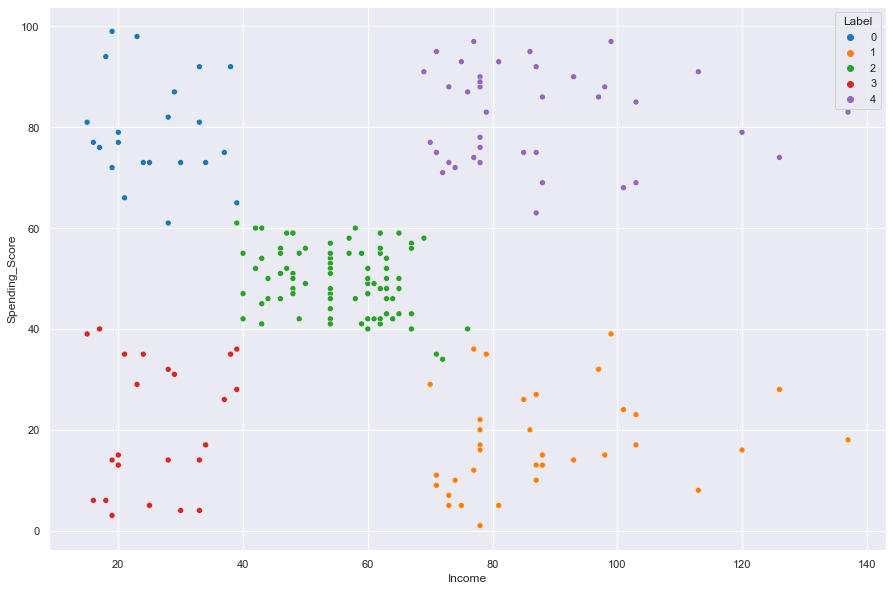

In [35]:

plt.figure(figsize=(15,10))
sns.scatterplot(df['Income'],df['Spending_Score'],hue='Label',palette='tab10',data=df)


In [29]:
## Customer Profiling

## we see that the customers from label 0 are our target customers as they earn more and spend more. They are target customers

## the customers from label 2 are the 'Selective buyers'. They earn a lot but are not easily willing to spend. We can give them
# royalties and do effective marketing to turn them into target customers

## the customers from label 1 are the 'Potential targets'. They can be chnaged into our targeted customers with special offers.

## customers from label 4 are 'Spending class'. They don't earn much but spend more.

## customers from label 3 are 'Wise Shoppers', they earn less so spend less. They can be given discounts to move them to 
    #spending class group

In [30]:
df['Category']=df.Label.map({0:'Target Customers',1:'Potential Targets',2:'Selective buyers',3:'Wise Shoppers',4:'Spending Class'})

In [31]:
df.head()

,Genre,Age,Income,Spending_Score,Label,Category
0,Male,19,15,39,3,Wise Shoppers
1,Male,21,15,81,0,Target Customers
2,Female,20,16,6,3,Wise Shoppers
3,Female,23,16,77,0,Target Customers
4,Female,31,17,40,3,Wise Shoppers


In [32]:
df

,Genre,Age,Income,Spending_Score,Label,Category
0,Male,19,15,39,3,Wise Shoppers
1,Male,21,15,81,0,Target Customers
2,Female,20,16,6,3,Wise Shoppers
3,Female,23,16,77,0,Target Customers
4,Female,31,17,40,3,Wise Shoppers
...,...,...,...,...,...,...
195,Female,35,120,79,4,Spending Class
196,Female,45,126,28,1,Potential Targets
197,Male,32,126,74,4,Spending Class
198,Male,32,137,18,1,Potential Targets
